<a href="https://colab.research.google.com/github/larsondg2000/Colab-Projects/blob/main/Mean_Reversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# you'll need ARIMA theory to understand this
# see: extra_reading.txt
x0 = 1 / (1 - 0.9)
sigma = 1 # standard deviation
data = [x0]
for t in range(300):
  if t == 0:
    x = 1 + 0.9 * x0 + np.random.randn() * sigma
  else:
    x = 1 + 0.9 * x + np.random.randn() * sigma
  data.append(x)

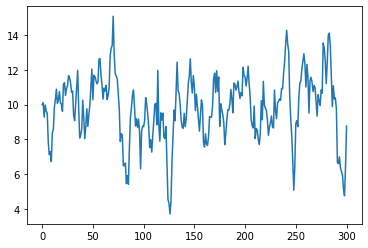

In [ ]:
plt.plot(data);

In [ ]:
series = pd.Series(data)

In [ ]:
# ignore the problem of looking into the future for now
z = (series - series.mean()) / series.std()

In [ ]:
z_mean = z.rolling(window=30).mean()
z_std = z.rolling(window=30).std()
upper_bound = z_mean + 2 * z_std
lower_bound = z_mean - 2 * z_std

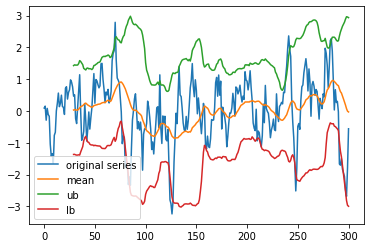

In [ ]:
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend();

In [ ]:
long_signal = (z < lower_bound).astype(int)
short_signal = (z > upper_bound).astype(int)

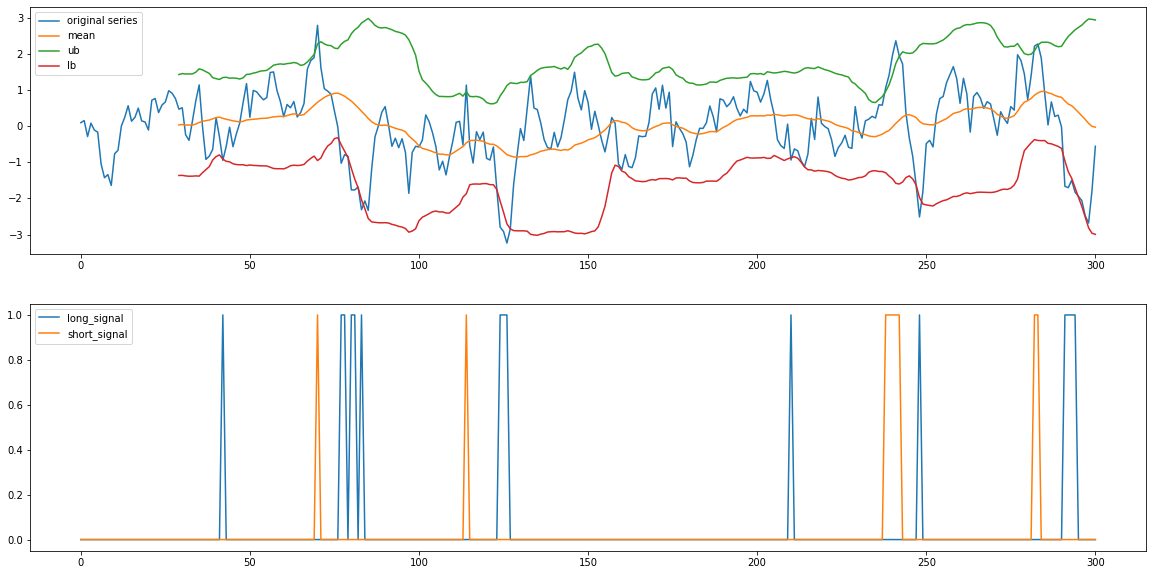

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(long_signal, label='long_signal')
plt.plot(short_signal, label='short_signal')
plt.legend();

In [ ]:
position = long_signal - short_signal

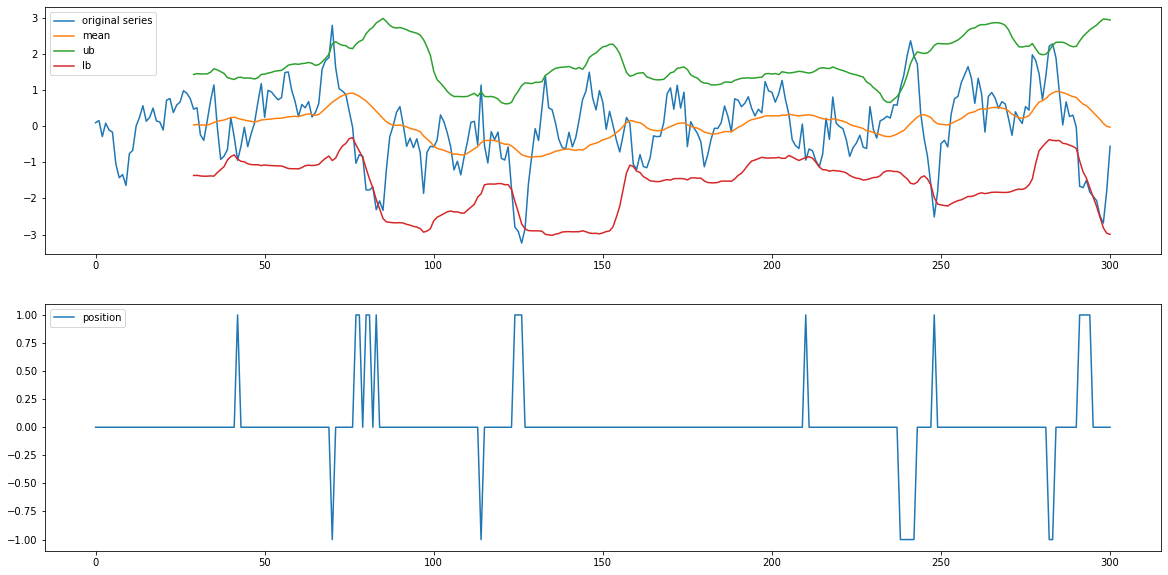

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(position, label='position')
plt.legend();

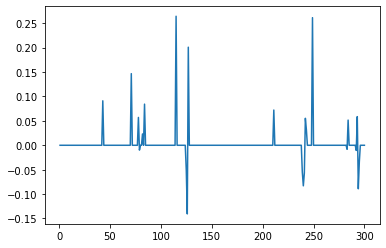

In [ ]:
# compute the cumulative return
daily_return = position.shift(1) * series.pct_change()
daily_return.plot();

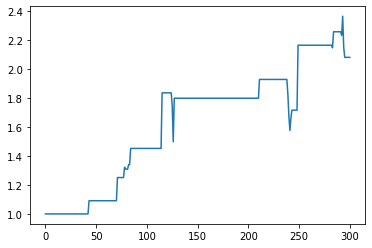

In [ ]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot();

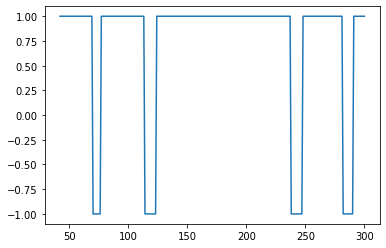

In [ ]:
position_filled = position.copy()
position_filled[position == 0] = np.nan
position_filled = position_filled.ffill()
position_filled.plot();

In [ ]:
position_filled.head(50)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
dtype: float64

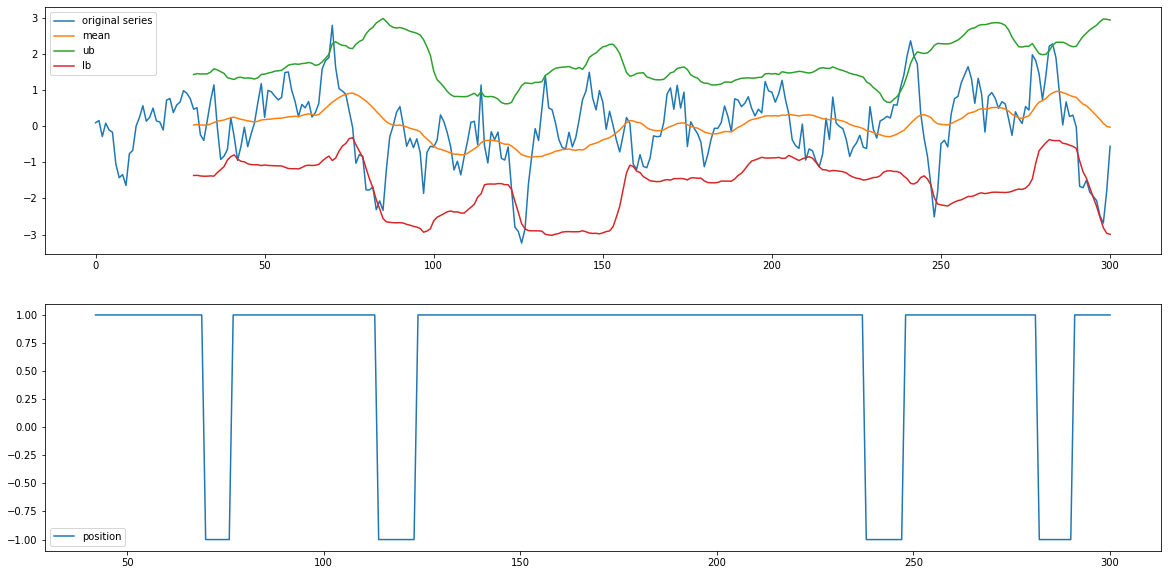

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(position_filled, label='position')
plt.legend();

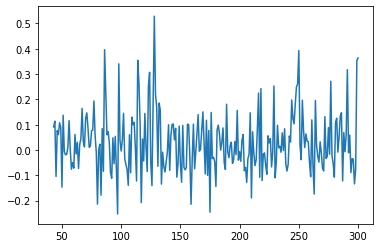

In [ ]:
# compute the cumulative return
daily_return2 = position_filled.shift(1) * series.pct_change()
daily_return2.plot();

In [ ]:
daily_return2.head(50)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43    0.091113
44    0.114068
45   -0.104296
46    0.076465
47    0.060687
48    0.107679
49    0.088975
dtype: float64

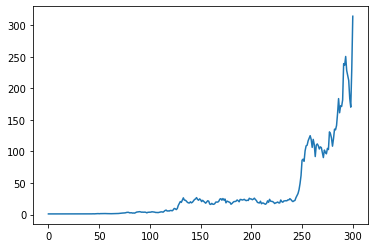

In [ ]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot();

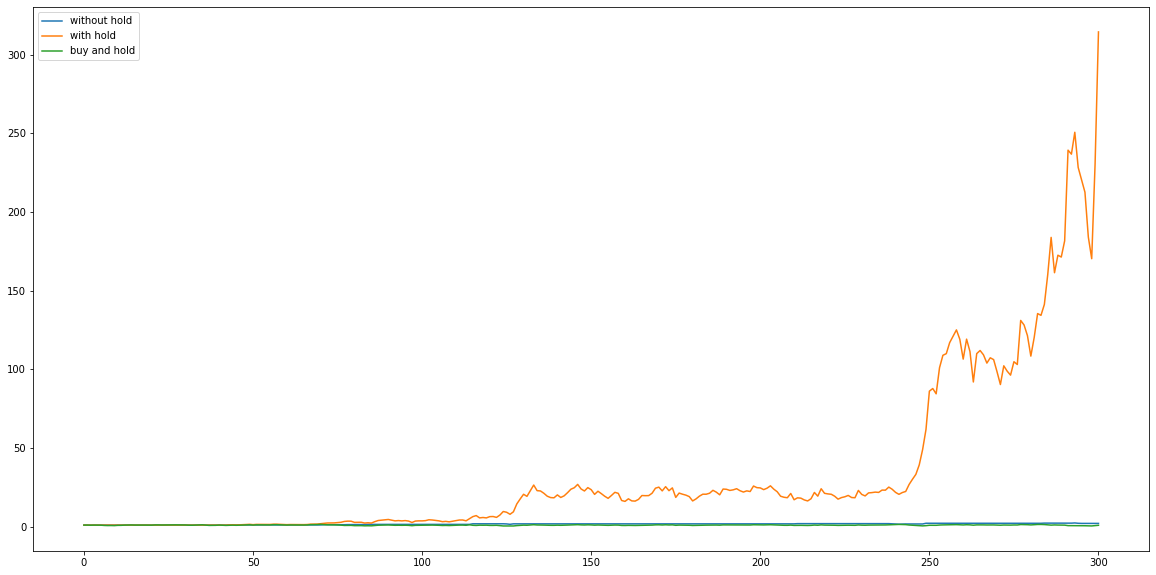

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label='without hold')
plt.plot(cumulative_return2, label='with hold')
plt.plot(series / series.iloc[0], label='buy and hold')
plt.legend();

In [ ]:
# now let's try with rolling mean and std
# so as not to "cheat" when computing z-score
series_mean = series.rolling(window=30).mean()
series_std = series.rolling(window=30).std()
z = (series - series_mean) / series_std

In [ ]:
z_mean = z.rolling(window=30).mean()
z_std = z.rolling(window=30).std()
upper_bound = z_mean + 2 * z_std
lower_bound = z_mean - 2 * z_std

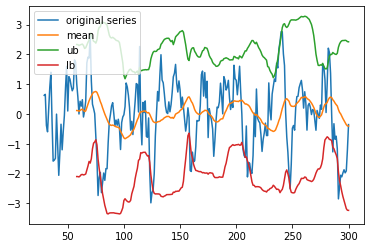

In [ ]:
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend();

In [ ]:
long_signal = (z < lower_bound).astype(int)
short_signal = (z > upper_bound).astype(int)

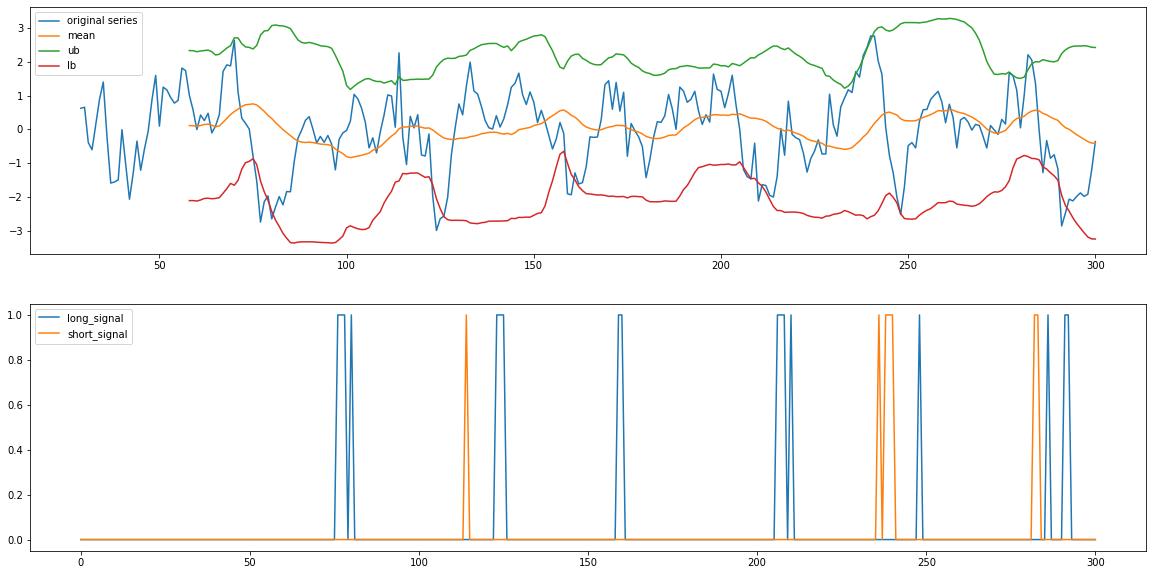

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(long_signal, label='long_signal')
plt.plot(short_signal, label='short_signal')
plt.legend();

In [ ]:
position = long_signal - short_signal

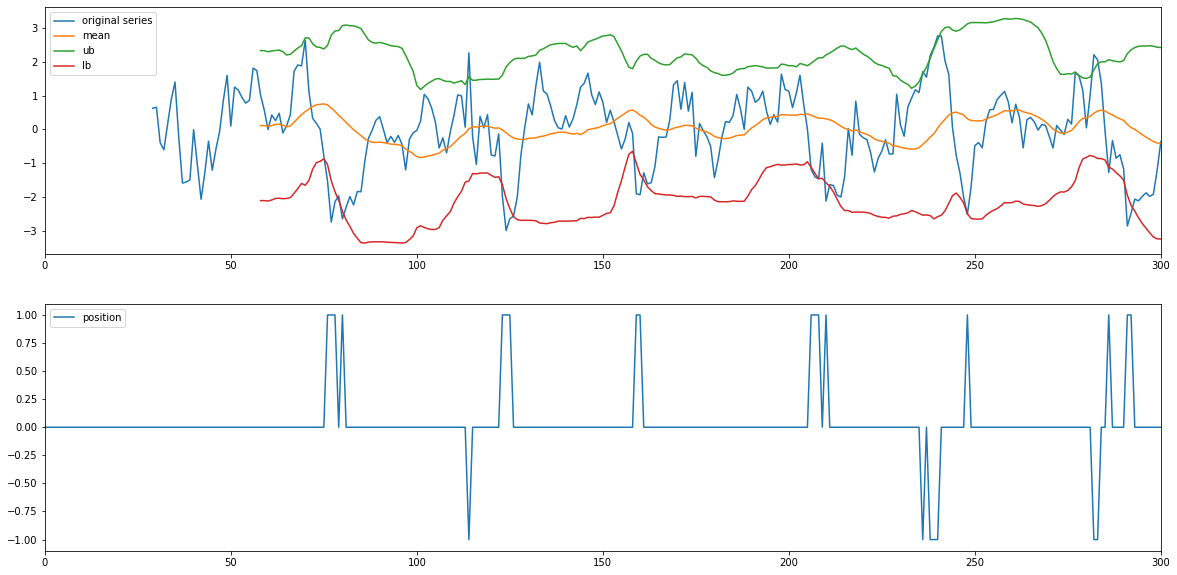

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.xlim([0, 300])
plt.legend()
plt.subplot(212)
plt.plot(position, label='position')
plt.xlim([0, 300])
plt.legend();

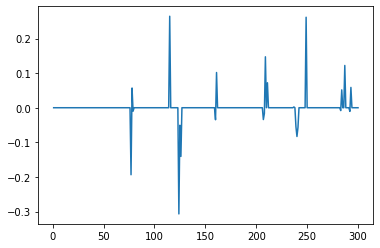

In [ ]:
# compute the cumulative return
daily_return = position.shift(1) * series.pct_change()
daily_return.plot();

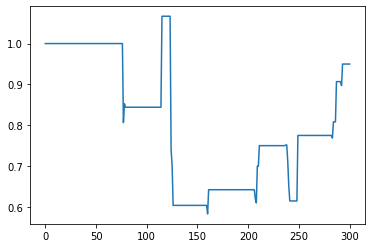

In [ ]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot();

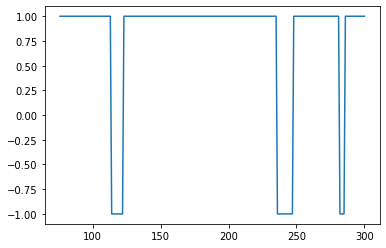

In [ ]:
position_filled = position.copy()
position_filled[position == 0] = np.nan
position_filled = position_filled.ffill()
position_filled.plot();

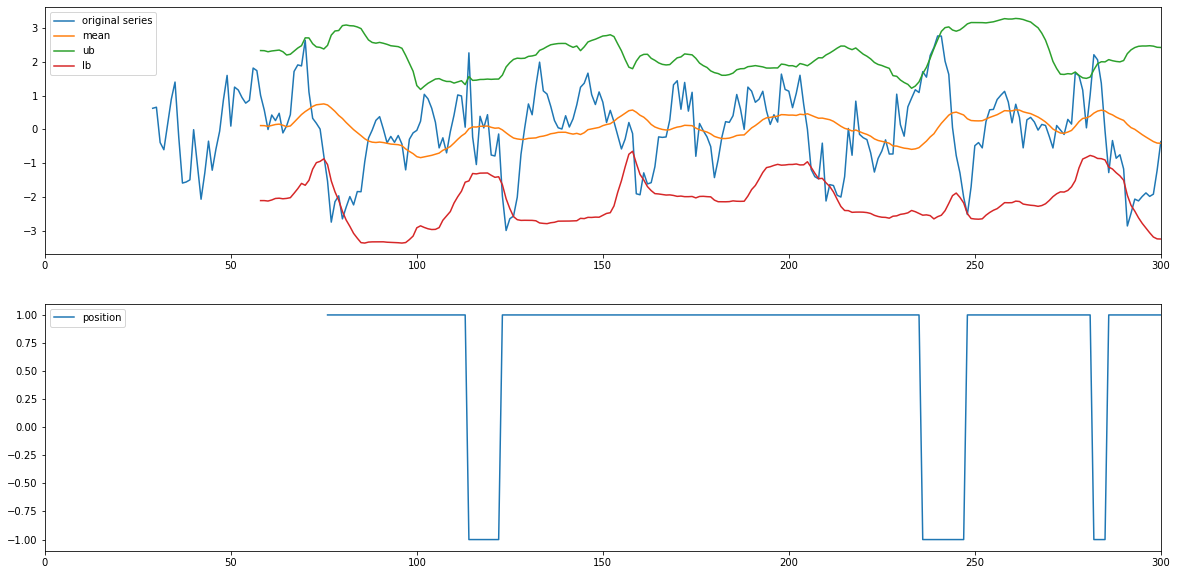

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.xlim([0, 300])
plt.legend()
plt.subplot(212)
plt.plot(position_filled, label='position')
plt.xlim([0, 300])
plt.legend();

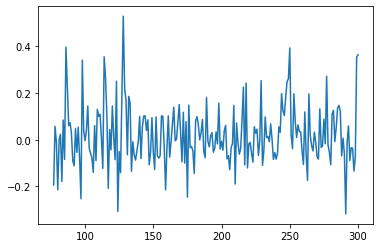

In [ ]:
# compute the cumulative return
daily_return2 = position_filled.shift(1) * series.pct_change()
daily_return2.plot();

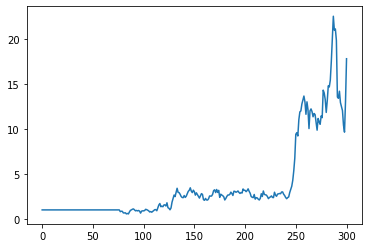

In [ ]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot();

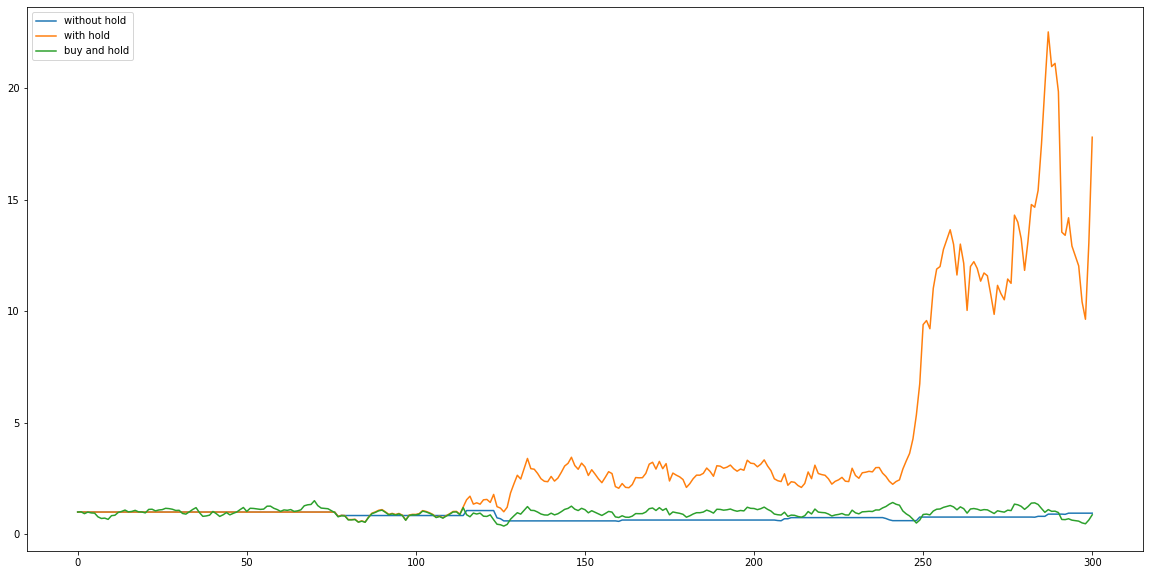

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label='without hold')
plt.plot(cumulative_return2, label='with hold')
plt.plot(series / series.iloc[0], label='buy and hold')
plt.legend();

In [ ]:
cumulative_return2.head(100)

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
        ...   
95    0.937584
96    0.863064
97    0.645199
98    0.864827
99    0.897069
Length: 100, dtype: float64

In [ ]:
df = pd.DataFrame({'a': [np.nan, 1, np.nan, np.nan], 'b': [np.nan, np.nan, 2, np.nan]})

In [ ]:
df.head()

,a,b
0,NaN,NaN
1,1.0,NaN
2,NaN,2.0
3,NaN,NaN


In [ ]:
df.ffill().head()

,a,b
0,NaN,NaN
1,1.0,NaN
2,1.0,2.0
3,1.0,2.0


In [ ]:
s = pd.Series([np.nan, 1, np.nan, np.nan])
s.head()

0    NaN
1    1.0
2    NaN
3    NaN
dtype: float64

In [ ]:
s.ffill().head()

0    NaN
1    1.0
2    1.0
3    1.0
dtype: float64

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=BA49TH_mraBJUE8qPYLAOA&n=Mean+Reversion)